In [ ]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle_diabetes.csv to kaggle_diabetes.csv


In [ ]:
import io
df_diabetes = pd.read_csv(io.BytesIO(uploaded['kaggle_diabetes.csv']))

# Exploring the Dataset

In [ ]:
df_diabetes.shape

(2000, 9)

In [ ]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
df_diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [ ]:
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


# Data Cleaning

In [ ]:
# Replacing 0 values to Nan values
df_diabetes_copy = df_diabetes.copy(deep=True)
df_diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']] = df_diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']].replace(0,np.nan)

In [ ]:
df_diabetes_copy.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

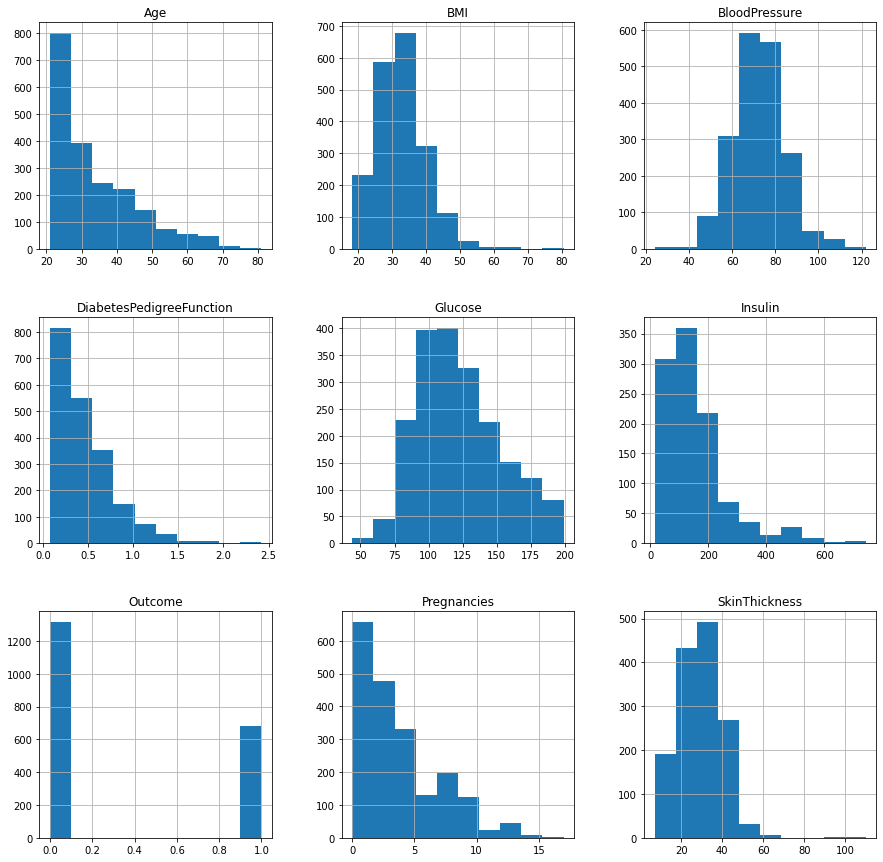

In [ ]:
# Make histogram to check data distribution and accordingly will decide to replace nan values by Mean or Median
p = df_diabetes_copy.hist(figsize=(15,15))

According to hist plot we can see that Glucose & BloodPressure nan values will replace by mean and other will by median

In [ ]:
df_diabetes_copy['BloodPressure'].fillna(df_diabetes_copy['BloodPressure'].mean(), inplace=True)
df_diabetes_copy['Glucose'].fillna(df_diabetes_copy['Glucose'].mean(), inplace=True)
df_diabetes_copy['SkinThickness'].fillna(df_diabetes_copy['SkinThickness'].median(), inplace=True)
df_diabetes_copy['Insulin'].fillna(df_diabetes_copy['Insulin'].median(), inplace=True)
df_diabetes_copy['BMI'].fillna(df_diabetes_copy['BMI'].median(), inplace=True)
df_diabetes_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

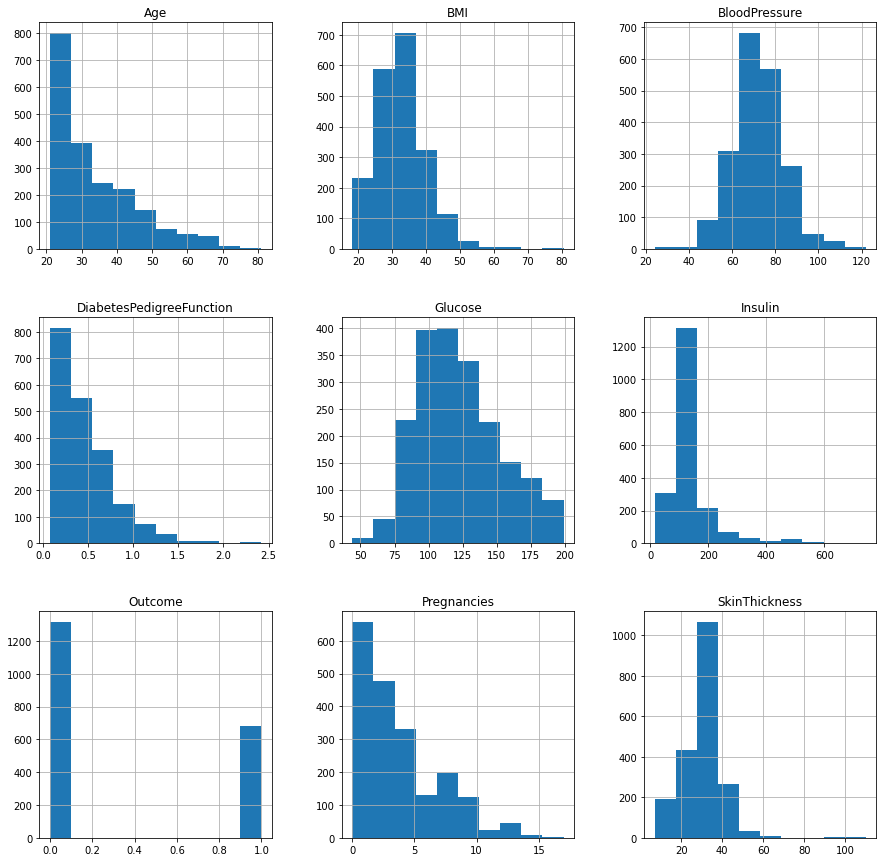

In [ ]:
p = df_diabetes_copy.hist(figsize=(15,15))

# Exploratory Data Analysis

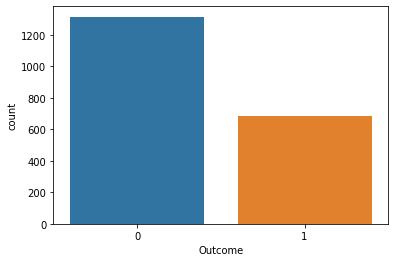

In [ ]:
# Explore the counts of Outcome
sns.countplot(x=df_diabetes_copy['Outcome'], data=df_diabetes_copy)

# Data Preprossing

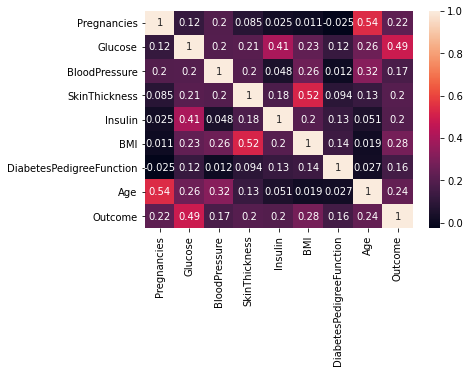

In [ ]:
# Checking Correlation
corr = df_diabetes_copy.corr()
sns.heatmap(data=corr, annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
x = df_diabetes_copy.drop(['Outcome'],axis=1)
y = df_diabetes_copy['Outcome'] 

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = scaler.fit_transform(x)
X = pd.DataFrame(x1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20,random_state = 0)
print('X_train_size :{}, X_test_size: {}'.format(X_train.shape,X_test.shape))

X_train_size :(1600, 8), X_test_size: (400, 8)


# Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [ ]:
# create classifier
clf1 = LogisticRegression(); 
clf2 = DecisionTreeClassifier(); 
clf3 = RandomForestClassifier();

In [ ]:
# fit model
clf1.fit(X_train,y_train);
clf2.fit(X_train,y_train);
clf3.fit(X_train,y_train);

In [ ]:
# run prediction on model  
y_pred_lr = clf1.predict(X_test);
y_pred_dt = clf2.predict(X_test);
y_pred_rf = clf3.predict(X_test);

In [ ]:
# create confusion matrix
LR = confusion_matrix(y_test,y_pred_lr);
print("logistic regression:",LR)
DT = confusion_matrix(y_test,y_pred_dt);
print("decision tree:", DT)
RF = confusion_matrix(y_test,y_pred_rf);
print("random forest:", RF)

logistic regression: [[242  30]
 [ 55  73]]
decision tree: [[270   2]
 [  2 126]]
random forest: [[272   0]
 [  2 126]]


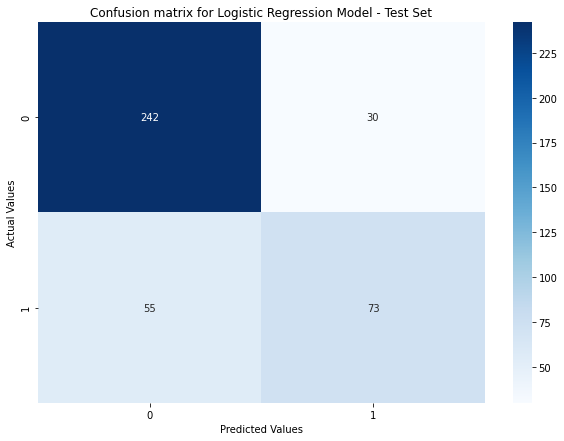

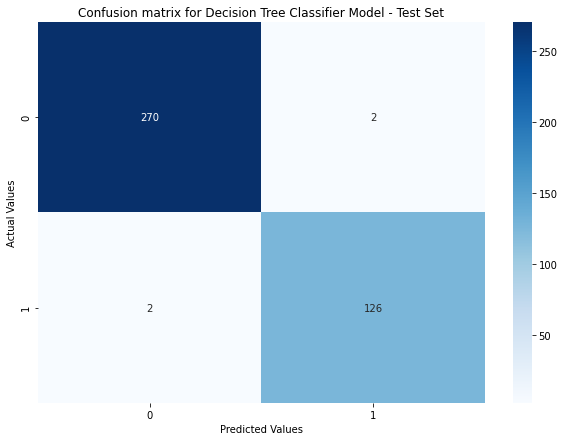

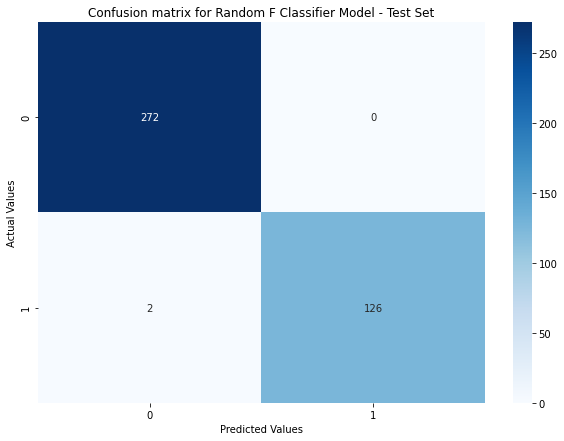

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(LR, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Logistic Regression Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

plt.figure(figsize=(10,7))
p = sns.heatmap(DT, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Decision Tree Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

plt.figure(figsize=(10,7))
p = sns.heatmap(RF, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random F Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
# Accuracy Score on test set
from sklearn.metrics import classification_report, accuracy_score
score = round(accuracy_score(y_test, y_pred_lr),4)*100
print("Accuracy on test set: {}%".format(score))

from sklearn.metrics import classification_report, accuracy_score
score = round(accuracy_score(y_test, y_pred_dt),4)*100
print("Accuracy on test set: {}%".format(score))

from sklearn.metrics import classification_report, accuracy_score
score = round(accuracy_score(y_test, y_pred_rf),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 78.75%
Accuracy on test set: 99.0%
Accuracy on test set: 99.5%


In [ ]:
# Prediction on training set
y_pred_lr_train = clf1.predict(X_train);
y_pred_dt_train = clf2.predict(X_train);
y_pred_rf_train = clf3.predict(X_train);

In [ ]:
# Accuracy Score on training set
score = round(accuracy_score(y_train, y_pred_lr_train),4)*100
print("Accuracy on train set: {}%".format(score))

score = round(accuracy_score(y_train, y_pred_dt_train),4)*100
print("Accuracy on train set: {}%".format(score))

score = round(accuracy_score(y_train, y_pred_rf_train),4)*100
print("Accuracy on train set: {}%".format(score))

Accuracy on train set: 78.0%
Accuracy on train set: 100.0%
Accuracy on train set: 100.0%


In [ ]:
# Classification Report
print(classification_report(y_train, y_pred_lr_train))

print(classification_report(y_train, y_pred_dt_train))

print(classification_report(y_train, y_pred_rf_train))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1044
           1       0.74      0.57      0.64       556

    accuracy                           0.78      1600
   macro avg       0.77      0.73      0.74      1600
weighted avg       0.78      0.78      0.77      1600

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       556

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       556

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
# get predicted probablities:
y_score_lr = clf1.predict_proba(X_test)[:, 1];
y_score_dt = clf2.predict_proba(X_test)[:, 1];
y_score_rf = clf3.predict_proba(X_test)[:, 1];

In [ ]:
#Plot ROC curve
# Create tpr, frp rates
fpr1,tpr1, threshold1= roc_curve(y_test, y_score_lr);
fpr2,tpr2, threshold2 = roc_curve(y_test, y_score_dt);
fpr3,tpr3, threshold3 = roc_curve(y_test, y_score_rf);

auc_lr = roc_auc_score(y_test,y_score_lr)
print('AUC_lr: %.5f' %auc_lr)
auc_dt = roc_auc_score(y_test, y_score_dt)
print('AUC_dt: %.5f' %auc_dt)
auc_rf = roc_auc_score(y_test, y_score_rf)
print('AUC_rf: %.5f' %auc_rf)

AUC_lr: 0.83792
AUC_dt: 0.98851
AUC_rf: 0.99977


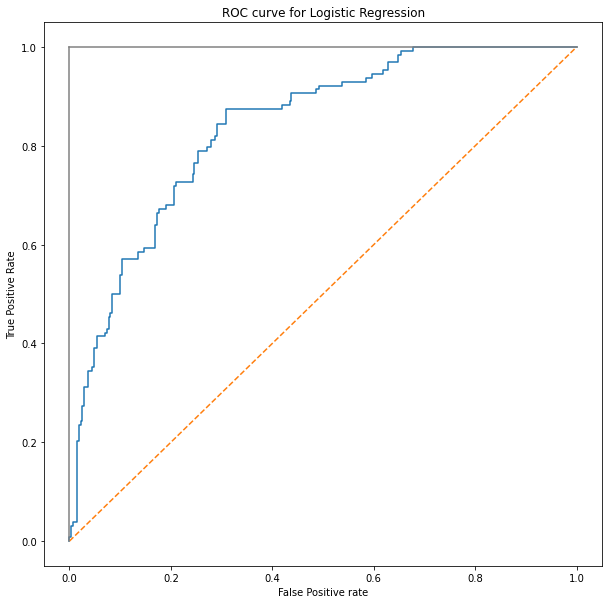

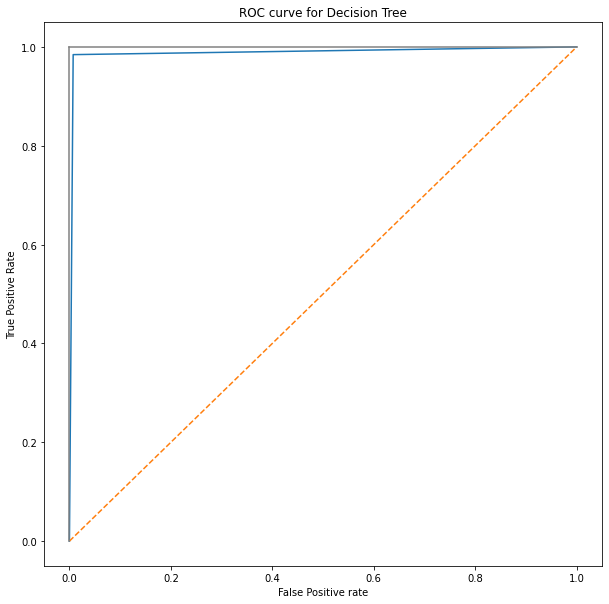

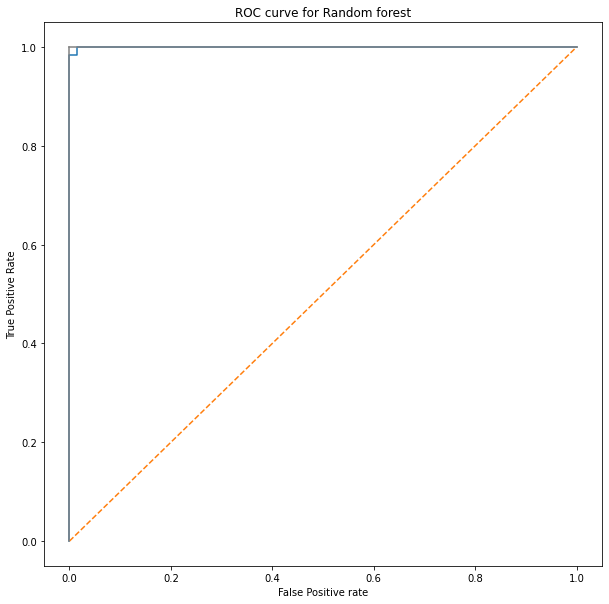

In [ ]:
# plot ROC curve
plt.subplots(1, figsize=(10,10))
plt.title("ROC curve for Logistic Regression")
plt.plot(fpr1,tpr1)
plt.plot([0,1], ls = "--")
plt.plot([0,0], [1,0], c= ".5"), plt.plot([1,1], c=".5")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title("ROC curve for Decision Tree")
plt.plot(fpr2,tpr2)
plt.plot([0,1], ls = "--")
plt.plot([0,0], [1,0], c= ".5"), plt.plot([1,1], c=".5")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title("ROC curve for Random forest")
plt.plot(fpr3,tpr3)
plt.plot([0,1], ls = "--")
plt.plot([0,0], [1,0], c= ".5"), plt.plot([1,1], c=".5")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.show()